In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

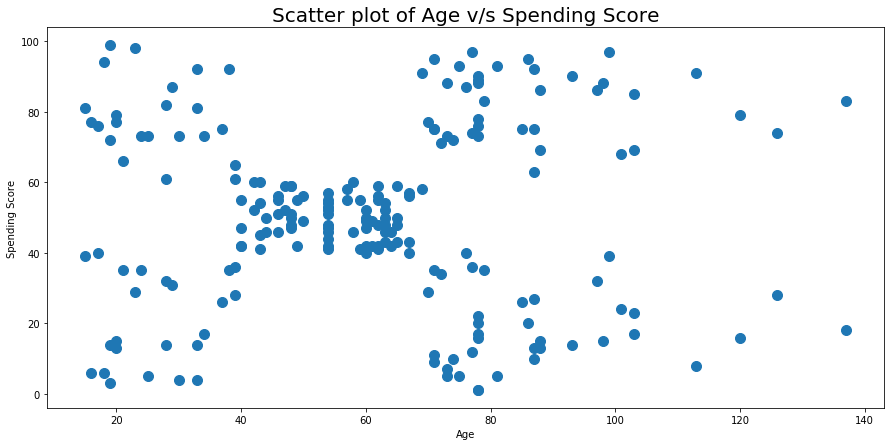

In [21]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data, s = 100)
plt.show()

In [15]:
x = data.iloc[:, [3, 4]]
x = np.array(x)

C:\Users\Dan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


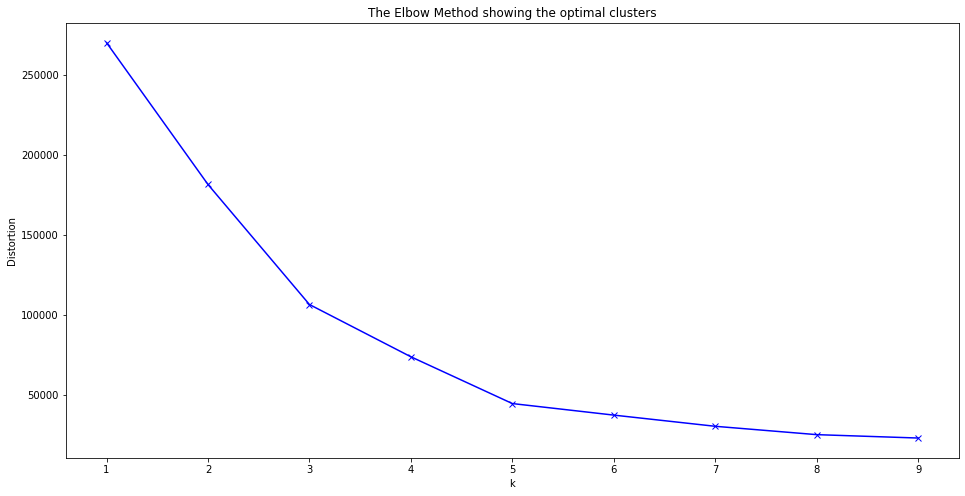

In [16]:
#Elbow Plot 
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal clusters")
plt.show()

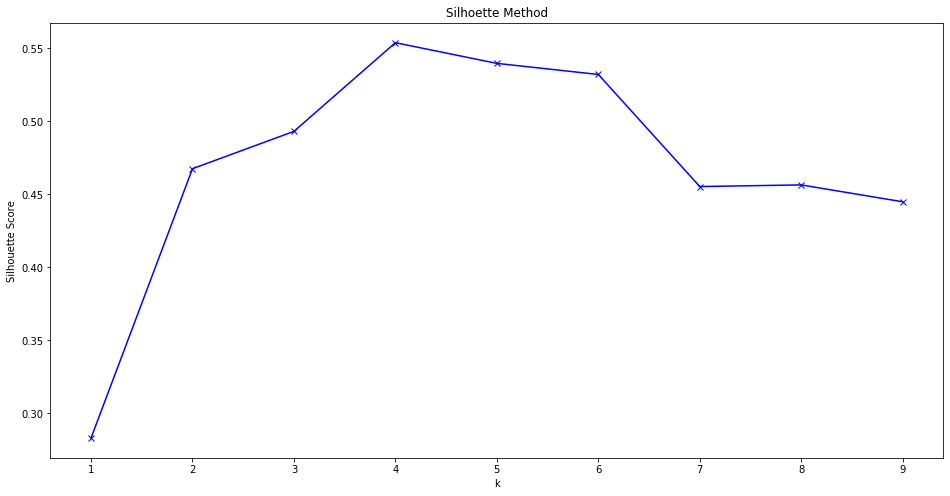

In [17]:
#The optimal K value is unclear when looking at the Elbow plot. Instead, the silhouette method will be used 
sil = []
kmax = 10

#Minimum 2 clusters
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

plt.figure(figsize=(16,8))
plt.plot(K, sil, "bx-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhoette Method")
plt.show()

In [20]:
#K = 4 is the optimal amount of clusters 
# Define the model
kmeans_model = KMeans(n_clusters=4)
# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(x)
data['Cluster'] = kmeans_predict

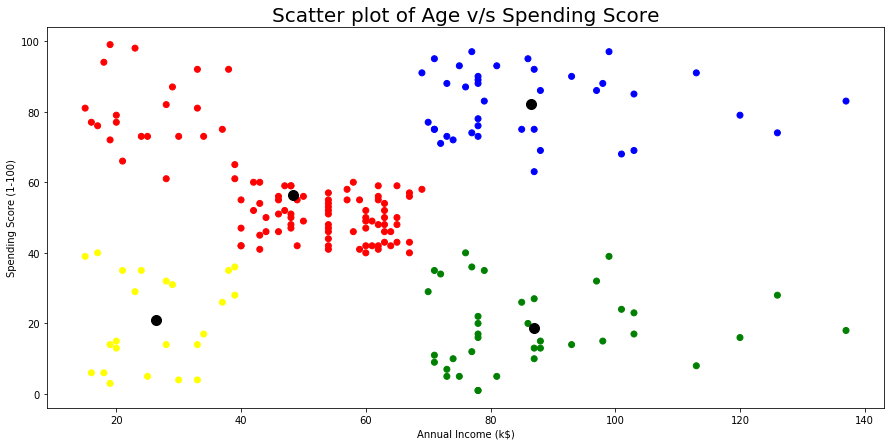

In [49]:
#Visualising the clusters and the centroids 

colors = {0:'red', 1:'green', 2:'blue', 3:'yellow'}

plt.figure(1, figsize=(15,7))
plt.scatter(x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'], c=data['Cluster'].map(colors))
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = "black")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.show()